# Plot the chevrons

In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function
%cd -q ../test/

In [2]:
%%writefile experiment_hists.py
#! /usr/bin/env python
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

Computes the histograms

"""
__author__ = "(c) Laurent Perrinet INT - CNRS"

import os
import numpy as np
import pickle
exp = 'srep'

## TODO precision (accross images) as alpha value?
from SparseEdges import EdgeFactory
parameter_file = 'default_param.py'
ef = EdgeFactory(parameter_file)
#######################################################################
def full_hist(edgeslist, **kwargs):
        v_hist = np.zeros((ef.pe.N_r, ef.pe.N_phi, ef.pe.N_Dtheta, ef.pe.N_scale, edgeslist.shape[2])) # bins=(self.edges_d, self.edges_phi, self.edges_theta, self.edges_loglevel)
        for i_image in range(edgeslist.shape[2]):
            v_hist[..., i_image] = ef.cohistedges(edgeslist[:, :, i_image][..., np.newaxis], display='none', **kwargs)
            v_hist[..., i_image] /= v_hist[..., i_image].sum()
        return v_hist
mat_edges_folder = 'data_cache/edges/'
matname = 'data_cache/' + exp + '_ms1a.npy'
try:
    v_hist1a = np.load(matname)
except Exception as e:
    edgeslist = np.load(os.path.join(mat_edges_folder, exp + '_serre07_distractors_edges.npy'))
    if not(os.path.isfile(matname + '_lock')):
        print('There is no histogram, creating one: ', e)
        open(matname + '_lock', 'w').close() # touching
        v_hist1a = full_hist(edgeslist, symmetry=False)
        np.save(matname, v_hist1a)
        os.remove(matname + '_lock')
    else:
        print(' Some process is building the histogram ' + matname)
        
matname = 'data_cache/' + exp + '_ms1.npy'
try:
    v_hist1 = np.load(matname)
except Exception as e:
    edgeslist = np.load(os.path.join(mat_edges_folder, exp + '_serre07_distractors_edges.npy'))
    if not(os.path.isfile(matname + '_lock')):
        print('There is no histogram, creating one: ', e)
        open(matname + '_lock', 'w').close() # touching
        v_hist1 = full_hist(edgeslist)
        np.save(matname, v_hist1)
        os.remove(matname + '_lock')
    else:
        print(' Some process is building the histogram ' + matname)

matname = 'data_cache/' + exp + '_ms1_shuffle.npy'
try:
    v_hist1_shuffle = np.load(matname)
except Exception as e:
    edgeslist = np.load(os.path.join(mat_edges_folder, exp + '_serre07_distractors_edges.npy'))
    for index in range(5):
        edgeslist[index, :, :] = np.random.permutation(edgeslist[index, :, :].ravel()).reshape(edgeslist[index, :, :].shape)
    if not(os.path.isfile(matname + '_lock')):
        print('There is no histogram, creating one: ', e)
        open(matname + '_lock', 'w').close() # touching
        v_hist1_shuffle = full_hist(edgeslist)
        np.save(matname, v_hist1_shuffle)
        os.remove(matname + '_lock')
    else:
        print(' Some process is building the histogram ' + matname)

matname = 'data_cache/' + exp + '_ms2a.npy'
try:
    v_hist2a = np.load(matname)
except Exception as e:
#     edgeslist = np.load(os.path.join('mat/', exp + '_serre07_targets_head_edges.npy'))
    edgeslist = np.load(os.path.join(mat_edges_folder, exp + '_serre07_targets_edges.npy'))
    if not(os.path.isfile(matname + '_lock')):
        print('There is no histogram, creating one: ', e)
        open(matname + '_lock', 'w').close() # touching
        v_hist2a = full_hist(edgeslist, symmetry=False)
        np.save(matname, v_hist2a)
        os.remove(matname + '_lock')
    else:
        print(' Some process is building the histogram ' + matname)

matname = 'data_cache/' + exp + '_ms2.npy'
try:
    v_hist2 = np.load(matname)
except Exception as e:
#     edgeslist = np.load(os.path.join('mat/', exp + '_serre07_targets_head_edges.npy'))
    edgeslist = np.load(os.path.join(mat_edges_folder, exp + '_serre07_targets_edges.npy'))
    if not(os.path.isfile(matname + '_lock')):
        print('There is no histogram, creating one: ', e)
        open(matname + '_lock', 'w').close() # touching
        v_hist2 = full_hist(edgeslist)
        np.save(matname, v_hist2)
        os.remove(matname + '_lock')
    else:
        print(' Some process is building the histogram ' + matname)

matname = 'data_cache/' + exp + '_ms3a.npy'
try:
    v_hist3a = np.load(matname)
except Exception as e:
    edgeslist = np.load(os.path.join(mat_edges_folder, exp + '_laboratory_edges.npy'))
    if not(os.path.isfile(matname + '_lock')):
        print('There is no histogram, creating one: ', e)
        open(matname + '_lock', 'w').close() # touching
        v_hist3a = full_hist(edgeslist, symmetry=False)
        np.save(matname, v_hist3a)
        os.remove(matname + '_lock')
    else:
        print(' Some process is building the histogram ' + matname)

matname = 'data_cache/' + exp + '_ms3.npy'
try:
    v_hist3 = np.load(matname)
except Exception as e:
    edgeslist = np.load(os.path.join(mat_edges_folder, exp + '_laboratory_edges.npy'))
    if not(os.path.isfile(matname + '_lock')):
        print('There is no histogram, creating one: ', e)
        open(matname + '_lock', 'w').close() # touching
        v_hist3 = full_hist(edgeslist)
        np.save(matname, v_hist3)
        os.remove(matname + '_lock')
    else:
        print(' Some process is building the histogram ' + matname)
        

Overwriting experiment_hists.py


In [3]:
%run experiment_hists.py

In [4]:
import numpy as np
np.set_printoptions(precision=4)#, suppress=True)

In [5]:
#from SparseEdges import EdgeFactory
#ef = EdgeFactory('default_param.py')
ef.pe.figpath = '../figures'
print(ef.pe)

{'verbose': 40, 'N_image': None, 'seed': 42, 'N_X': 256, 'N_Y': 256, 'noise': 0.33, 'do_mask': True, 'mask_exponent': 3.0, 'do_whitening': True, 'white_name_database': 'serre07_distractors', 'white_n_learning': 0, 'white_N': 0.07, 'white_N_0': 0.0, 'white_f_0': 0.4, 'white_alpha': 1.4, 'white_steepness': 4.0, 'white_recompute': False, 'base_levels': 1.618, 'n_theta': 24, 'B_sf': 0.4, 'B_theta': 0.17453277777777776, 'N': 2048, 'MP_alpha': 0.7, 'MP_rho': None, 'eta_SO': 0.0, 'MP_do_mask': True, 'd_width': 45.0, 'd_min': 0.5, 'd_max': 2.0, 'N_r': 6, 'N_Dtheta': 24, 'N_phi': 12, 'N_scale': 5, 'loglevel_max': 7, 'edge_mask': True, 'do_rank': False, 'scale_invariant': True, 'multiscale': True, 'kappa_phase': 0.0, 'weight_by_distance': True, 'svm_n_jobs': -1, 'svm_test_size': 0.2, 'N_svm_grid': 32, 'N_svm_cv': 50, 'C_range_begin': -5, 'C_range_end': 10.0, 'gamma_range_begin': -14, 'gamma_range_end': 3, 'svm_KL_m': 0.34, 'svm_tol': 0.001, 'svm_max_iter': -1, 'svm_log': False, 'svm_norm': False

### Plot the chevrons

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width_pt = 265. # Get this from LaTeX using \showthe\columnwidth
fig_width = fig_width_pt*inches_per_pt  # width in inches


In [8]:
figsize1 = (fig_width, 2*fig_width)
figsize2 = (fig_width, fig_width*.9)

In [9]:
v_hist1_chevron = v_hist1.sum(axis=-1).sum(axis=3).sum(axis=0)
print (' Figure 2 : maximum of chevron map is ', v_hist1_chevron.max()/v_hist1_chevron.mean(), ' minimum is ', v_hist1_chevron.min()/v_hist1_chevron.mean())

 Figure 2 : maximum of chevron map is  2.99341593289  minimum is  0.872657346458


> figure 2 : chevron map 


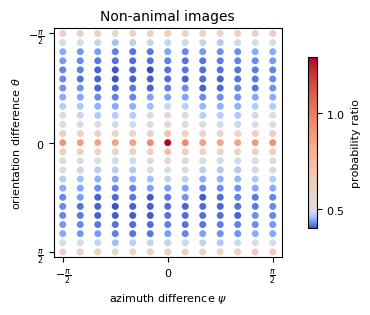

In [10]:
v_max, v_min = 2., -1.
v_max, v_min = None, None
print('> figure 2 : chevron map ')
fig = plt.figure(figsize=figsize2)
ratio = figsize2[1]/figsize2[0]
border = 0.15
#              *left*, *bottom*, *width*, *height*
a = fig.add_axes((.13, border*ratio/2, 1.-border, 1.-border*ratio), axisbg='w')
#     a = fig.add_axes((.15, .11, .78, .88), axisbg='w')
a.axis(c='b', lw=0)
dolog = False
dolog = True
#              *left*, *bottom*, *width*, *height*
fig, a = ef.cohistedges(edgeslist=None, v_hist=v_hist1.sum(axis=-1), fig=fig, a=a, display='chevrons', 
                             dolog=dolog, labels=True, xticks=True, colorbar=True, v_min=v_min, v_max=v_max)
_ = a.set_title('Non-animal images', fontsize=10)

In [11]:
ef.savefig(fig, 'figure_chevrons')

### Plot the conditional probabilities

 figure 3 : conditional probabilies 
 Figure 3 : maximum of animal vs non-animal map is  1.10114485638  minimum is  0.477228053357


/Users/lolo/pool/science/BICV/SparseEdges/SparseEdges/SparseEdges.py:688: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if not(prior==None):


 Figure 3 : maximum of man-made vs non-animal map is  1.37924252369  minimum is  0.892817797451  mean  1.00025567326


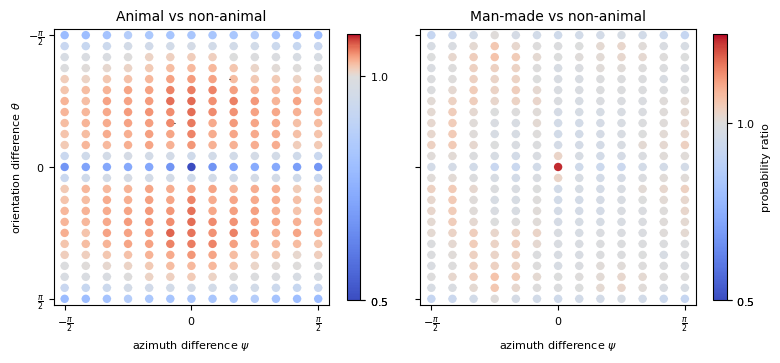

In [12]:
figsize3 = (2*fig_width, 2*fig_width/1.618)

print(' figure 3 : conditional probabilies ')
dolog = False
dolog = True
half = True
half = False
labels = False
labels = True
fig = plt.figure(figsize=figsize3)
ratio = figsize3[1]/figsize3[0]
border = 0.03

#              *left*, *bottom*, *width*, *height*
a = fig.add_axes((0.03, border*ratio, .5-border, 1.-border*ratio), axisbg='w')
xticks=True
v_hist_angle = v_hist2.sum(axis=(0, 3)).mean(axis=-1) / v_hist1.sum(axis=(0, 3)).mean(axis=-1) # -d-, phi, theta, -scale-
print (' Figure 3 : maximum of animal vs non-animal map is ', v_hist_angle.max()/v_hist_angle.mean(), ' minimum is ', v_hist_angle.min()/v_hist_angle.mean())
a.axis(c='b', lw=0)
#     v_max, v_min = 2., -1.
v_max, v_min = None, None
v_max, v_min = .19, -1.
fig, a = ef.cohistedges(edgeslist=None, v_hist=v_hist2.mean(axis=-1), prior=v_hist1.mean(axis=-1), v_min=v_min, v_max=v_max,
                        fig=fig, a=a, display='chevrons', dolog=dolog, labels=labels, xticks=xticks, half=half, cbar_label=False)
_ = a.set_title('Animal vs non-animal', fontsize=10)

#                 *left*,    *bottom*, *width*, *height*
a = fig.add_axes((.5+border, border*ratio, .5-border, 1.-border*ratio), axisbg='w')
a.axis(c='b', lw=0)

v_hist3_angle = v_hist3.sum(axis=(0, 3)) # -d-,phi,  theta, -scale-
v_hist2_angle = v_hist2.sum(axis=(0, 3)) # -d-,phi,  theta, -scale-
v_hist1_angle = v_hist1.sum(axis=(0, 3)) # -d-,phi,  theta, -scale-

v_hist_angle = v_hist3.sum(axis=(0, 3)).mean(axis=-1) / v_hist1.sum(axis=(0, 3)).mean(axis=-1) # -d-, phi, theta, -scale-
print(' Figure 3 : maximum of man-made vs non-animal map is ', v_hist_angle.max()/v_hist_angle.mean(), 
      ' minimum is ', v_hist_angle.min()/v_hist_angle.mean(), " mean ", v_hist_angle.mean())
v_max, v_min = .5, -1.
xticks = 'bottom'
fig, a = ef.cohistedges(edgeslist=None, v_hist=v_hist3.mean(axis=-1), prior=v_hist1.mean(axis=-1), v_min=v_min, v_max=v_max,
                        fig=fig, a=a, display='chevrons', dolog=dolog, labels=labels, xticks=xticks, half=half, colorbar=True)

a.set_title('Man-made vs non-animal', fontsize=10)

In [13]:
ef.savefig(fig, 'figure_chevrons2')

### Geisler plots

In [14]:
figsize4 = (fig_width, fig_width/1.618)
figsizeSM2 = (fig_width, fig_width/1.618/2)
figsizeSM3 = (fig_width, fig_width/1.618)

> figure SM2A : geisler colin 


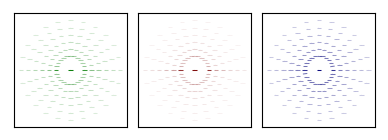

In [15]:
print('> figure SM2A : geisler colin ')

fig, a = plt.subplots(1, 3, figsize=figsizeSM2)

# natural
v_hist_noscale = v_hist1a.sum(axis=-1)
fig, a[0] = ef.cohistedges(edgeslist=None, v_hist=v_hist_noscale, fig=fig, a=a[0], display='colin_geisler', color='green')
# man-made
v_hist_noscale = v_hist3a.sum(axis=-1)
fig, a[1] = ef.cohistedges(edgeslist=None, v_hist=v_hist_noscale, fig=fig, a=a[1], display='colin_geisler', color='brown')
# animal
v_hist_noscale = v_hist2a.sum(axis=-1)
fig, a[2] = ef.cohistedges(edgeslist=None, v_hist=v_hist_noscale, fig=fig, a=a[2], display='colin_geisler', color='blue')

plt.subplots_adjust(left=0., right=1., bottom=0., top=1., wspace=0.05, hspace=0.05,)

ef.savefig(fig, 'figureSM2A')


> figure SM2B : geisler cocir 


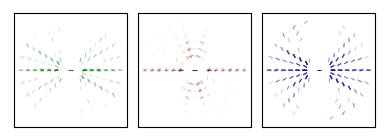

In [16]:
print('> figure SM2B : geisler cocir ')

fig, a = plt.subplots(1, 3, figsize=figsizeSM2)

# natural
v_hist_noscale = v_hist1a.sum(axis=-1)
fig, a[0] = ef.cohistedges(edgeslist=None, v_hist=v_hist_noscale, fig=fig, a=a[0], display='cocir_geisler', color='green')
# man-made
v_hist_noscale = v_hist3a.sum(axis=-1)
fig, a[1] = ef.cohistedges(edgeslist=None, v_hist=v_hist_noscale, fig=fig, a=a[1], display='cocir_geisler', color='brown')
# animal
v_hist_noscale = v_hist2a.sum(axis=-1)
fig, a[2] = ef.cohistedges(edgeslist=None, v_hist=v_hist_noscale, fig=fig, a=a[2], display='cocir_geisler', color='blue')

plt.subplots_adjust(left=0., right=1., bottom=0., top=1., wspace=0.05, hspace=0.05,)

ef.savefig(fig, 'figureSM2B')

> figure SM3 : configuration variables do not change significantly across categories 
 Figure SM3 : in  Shuffled  maximum of p(d)  0.217218888921  minimum is  0.123966730834
 Figure SM3 : in  Non-animal  maximum of p(d)  0.240138406817  minimum is  0.112589112496
 Figure SM3 : in  Animal  maximum of p(d)  0.252027243129  minimum is  0.105069919934
 Figure SM3 : in  Man-made  maximum of p(d)  0.333509021794  minimum is  0.0786921174541


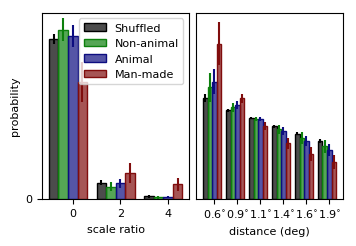

In [17]:
print('> figure SM3 : configuration variables do not change significantly across categories ')
import matplotlib
#fig = plt.figure(figsize=(fig_width, fig_width*1.618))
ef.init_binedges()

fig = plt.figure(figsize=figsizeSM3)
#    # Using contourf to provide my colorbar info, then clearing the figure
#import matplotlib.cm as cm
#v_min, v_max = 0.134274410939, 4446.19789307
#levels = range(v_min,v_max+200.,200.)
#CS3 = plt.contourf(v_hist1.sum(axis=-1).sum(axis=-1), cmap=cm.hot)
#plt.clf()

#             *left*, *bottom*, *width*, *height*
a1 = fig.add_axes((.10, .18, .4, .82), axisbg='w')
a2 = fig.add_axes((.52, .18, .4, .82), axisbg='w')
bars_width = .8
i_bar = 0
for v_hist, label, color, marker in zip([v_hist1_shuffle, v_hist1, v_hist2, v_hist3],
                                          ['Shuffled', 'Non-animal', 'Animal', 'Man-made'],
                                          ['k', (0.05, 0.5, 0.05), (0.05, 0.05, 0.5), (0.5, 0.05, 0.05)], ['.', 's', 'o', 'd']):
    proba_sigma = v_hist.sum(axis=0).sum(axis=0).sum(axis=0)
    proba_sigma /= proba_sigma.sum(axis=0).sum(axis=0)/proba_sigma.shape[-1]
    bin_size = (ef.binedges_loglevel[1]-ef.binedges_loglevel[0])
    middles = (ef.binedges_loglevel[:-1]+ef.binedges_loglevel[1:])/2 + (i_bar/4.-.5)*bars_width*bin_size
    #print middles.shape, proba_sigma.shape, proba_sigma.mean(axis=-1).shape
    bar_color = matplotlib.colors.colorConverter.to_rgba(color, alpha=.7)
    edge_color = matplotlib.colors.colorConverter.to_rgba(color, alpha=1.)
    a1.bar(middles[2:], proba_sigma.mean(axis=-1)[2:], yerr=proba_sigma.std(axis=-1)[2:], error_kw={'ecolor':color}, color=bar_color, edgecolor=edge_color, label = label, width=bars_width*bin_size/4.)
    proba_d = v_hist.sum(axis=1).sum(axis=1).sum(axis=1)
    proba_d /= proba_d.sum(axis=0).sum(axis=0)/proba_d.shape[-1]
    print (' Figure SM3 : in ', label, ' maximum of p(d) ', proba_d.mean(axis=-1).max(), ' minimum is ', proba_d.mean(axis=-1).min())
    bin_size = (ef.binedges_d[1]-ef.binedges_d[0])
    middles = (ef.binedges_d[:-1]+ef.binedges_d[1:])/2. + (i_bar/4.-.5)*bars_width*bin_size
    a2.bar(middles , proba_d.mean(axis=-1), yerr=proba_d.std(axis=-1), error_kw={'ecolor':color}, color=bar_color, edgecolor=edge_color, label = label, width=bars_width*bin_size/4.)
    i_bar += 1

a1.set_ybound(lower=0., upper=1.59*proba_sigma.mean(axis=-1).max())
a2.set_ybound(lower=0., upper=1.2*proba_d.mean(axis=-1).max())
#adjust_spines(a1,['left','bottom'])
#adjust_spines(a2,['left','bottom'])
plt.setp(a1, yticks=[0])
plt.setp(a1, yticklabels=['0'])
middles = (ef.binedges_loglevel[:-1]+ef.binedges_loglevel[1:])/2
plt.setp(a1, xticks=middles[2:])
#plt.setp(a1, xticklabels=['1/4', '1/2', '0', '2', '4'])
plt.setp(a1, xticklabels=['0', '2', '4'])
#help(a1.legend)
plt.setp(a1, xlabel='scale ratio')
plt.setp(a1, ylabel='probability')
middles = (ef.binedges_d[:-1]+ef.binedges_d[1:])/2.
plt.setp(a2, xticks=middles)
plt.setp(a2, xticklabels=[ r'$%0.1f^{\circ}$' %d for d in middles])#str(ef.pe.d_min), str(ef.pe.d_max)])
plt.setp(a2, xlabel='distance (deg)')
#     plt.setp(a2, ylabel='probability')
plt.setp(a2, yticks=[])
plt.setp(a2, yticklabels=[])
a1.grid(False)
a2.grid(False)
a1.legend(loc = 'upper right')#'lower left') # , bbox_to_anchor = (0.5, 1.75))

ef.savefig(fig, 'figureSM3')

## version control

In [18]:
!ls -l ../figures/figure_synthesis.pdf

-rw-r--r--  1 lolo  staff  631144 Jan 31 11:07 ../figures/figure_synthesis.pdf


In [19]:
!git s
#!git add  ../figures/figureSM*  ../figures/figure_chevrons*

 M ../Makefile
 M ../figures/MPtutorial.pdf
 M ../figures/MPtutorial.svg
 M ../figures/MPtutorial_rec.pdf
 M ../figures/MPtutorial_rec.svg
 D ../figures/figure4.png
 M ../figures/figureSM2A.pdf
 M ../figures/figureSM2A.svg
 M ../figures/figureSM2B.pdf
 M ../figures/figureSM2B.svg
 M ../figures/figureSM3.jpg
 M ../figures/figureSM3.pdf
 M ../figures/figureSM3.png
 M ../figures/figureSM3.svg
 M ../figures/figureSM_FA.pdf
 M ../figures/figureSM_FA.svg
 M ../figures/figure_chevrons.jpg
 M ../figures/figure_chevrons.pdf
 M ../figures/figure_chevrons.png
 M ../figures/figure_chevrons.svg
 M ../figures/figure_chevrons2.jpg
 M ../figures/figure_chevrons2.pdf
 M ../figures/figure_chevrons2.png
 M ../figures/figure_chevrons2.svg
M  ../figures/figure_chevrons_animals.pdf
M  ../figures/figure_chevrons_animals.svg
M  ../figures/figure_chevrons_animals_FR.pdf
M  ../figures/figure_chevrons_animals_FR.svg
 M ../ms/PerrinetBednar15supplementary.tex
 M "../notebooks/0 installation.ipynb"
 M "../notebook

In [20]:
!git d *py

fatal: ambiguous argument 'default_param.py': unknown revision or path not in the working tree.
Use '--' to separate paths from revisions, like this:
'git <command> [<revision>...] -- [<file>...]'


In [21]:
!git commit -m' replicating chevron plots' ../notebooks/3\ notebook_figure_chevrons.ipynb ../figures/figure_chevron*  ../figures/figureSM*
#!git push

[master 7301ca7]  replicating chevron plots
 23 files changed, 12636 insertions(+), 12653 deletions(-)
 rewrite figures/figureSM3.jpg (71%)
 rewrite figures/figureSM3.png (98%)
 rewrite figures/figure_chevrons.jpg (84%)
 rewrite figures/figure_chevrons.png (94%)
 rewrite figures/figure_chevrons2.jpg (73%)
 rewrite figures/figure_chevrons2.png (87%)
